## Made by VanPhu Điện tử 11 - K63 RHUST
https://www.facebook.com/phu.smallcityboiz

Source Code này chủ yếu để giải (hầu hết) bài tập trong đề cương phương pháp tính.
Code chỉ hỗ trợ việc tính toán, muốn hiểu hàm xuất ra những gì thì cần học và hiểu cách tính.
Trong chương trình học còn thuật toán Gauss-Seidel và tính đạo hàm gần đúng mình chưa viết được do phần đó tự đọc :(.
Mình còn gà nên code hơi cồng kềnh, mong các bạn thông cảm. Nếu có thắc mắc về cách sử dụng các hàm có thể ib cho mình vào link fb ở trên (mình không giảng lại lý thuyết).

#### Note:
(Nếu chưa biết về 1 số hàm trong thư viện numpy)

    x**a = x^a (a phải là số nguyên)
    np.sqrt(a) = căn2(a)
    np.cbrt(a) = căn3(a)
    np.ones((1, 3)) = [[1, 1, 1]] (ma trận 1x3)
    np.zeros((2, 3)) = [[0, 0, 0], (ma trận 2x3)
                        [0, 0, 0]]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from full_code import chiadoi, tieptuyen, daycung, lapdon, Gauss, Gauss_Jordan, lapJacobi, lapdon_matrix, giai_Gauss,\
giai_GaussJordan, chuan1, chuan2, chuanvocung, chuanEuclid, hoocner, hoocnenguoc, NoisuyLG, NoisuyNewtonLui, NoisuyNewtonTien, \
NoisuyNTcachdeuLui, NoisuyNTcachdeuTien, nhapX, nhapY, Binhphuongtoithieu, Tichphangandung_HT, Simpson, Euler_hien, Euler_an,\
Euler_caitien, RK_4, giaithua

# Sai số

In [2]:
def saisotuongdoi(gandung, saiso):
    return saiso/gandung*100

saisotuongdoi(2.15, 0.01)

0.46511627906976744

In [2]:
def chusodangtin(a, saisotuongdoi=0, saisotuyetdoi=0):
    if saisotuongdoi != 0:
        saisotuyetdoi = a*saisotuongdoi
    i = -20
    while(saisotuyetdoi > 0.5*(10**i)):
        i += 1
    if i >= 0:
        return int(a/(10**i))
    else:
        return int(a*(10**(-i)))

chusodangtin(0.2908, saisotuongdoi=0.0068)

29

In [4]:
def ham(a):# tự viết
    return 6.5*np.sqrt(a+1)
def daoham(a):# tự viết
    return 6.5/np.sqrt(a+1)
def saisotuyetdoicuaham(a, delta_a):
    return daoham(a)*delta_a
def saisotuongdoicuaham(a, delta_a):
    return saisotuyetdoicuaham(a, delta_a)/ham(a)

chusodangtin(ham(0.809216), saisotuongdoicuaham(0.809216, 2.7*(10**-5)))

8742

In [3]:
def ham(a, b):# tự viết
    return a**3 + a*b + b**3
def daohama(a, b):# tự viết
    return 3*a**2 + b
def daohamb(a, b):# tự viết
    return 3*b**2 + a
def saisotuyetdoicuaham(a, delta_a, b, delta_b):
    return daohama(a, b)*delta_a + daohamb(a, b)* delta_b
def saisotuongdoicuaham(a, delta_a, b, delta_b):
    return saisotuyetdoicuaham(a, delta_a, b, delta_b)/ham(a, b)

saisotuyetdoicuaham(3.8071, 0.0063, 0.4495, 0.0008)

0.280299247349

In [6]:
def ham(a, b, c):# tự viết
    return 2*a + b - 0.5*c
def daohama(a, b, c):# tự viết
    return 2
def daohamb(a, b, c):# tự viết
    return 1
def daohamc(a, b, c):# tự viết
    return 0.5
def saisotuyetdoicuaham(a, delta_a, b, delta_b, c, delta_c):
    return np.abs(daohama(a, b, c))*delta_a + np.abs(daohamb(a, b, c))* delta_b + np.abs(daohamc(a, b, c))* delta_c
def saisotuongdoicuaham(a, delta_a, b, delta_b, c, delta_c):
    return saisotuyetdoicuaham(a, delta_a, b, delta_b, c, delta_c)/ham(a, b, c)

saisotuyetdoicuaham(0, 0.012, 0, 0.023, 0, 0.123)

0.1085

# Chia đôi

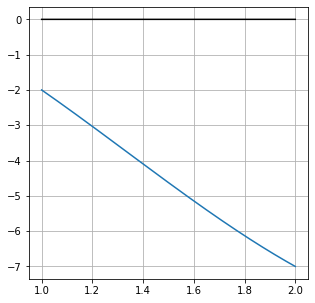

In [21]:
x = np.linspace(1,2, 100000)
plt.figure(figsize=(5,5))
y =  x**3 - 4*x**2 + 1
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')
# plt.plot(x,x)
plt.grid()

In [13]:
def f(x): # tự viết
    return x**5 - 17

a = 1.7
b = 1.8
n = 6
epxilon = 0
# Nếu bài toán cho trước n thì để epxilon = 0 và ngược lại

chiadoi(f, a, b, n=n, epxilon=epxilon)

a: 1.7, b: 1.8
x: 1.75
f(x) = -0.5869140625
delta: 0.050000000000000044

a: 1.75, b: 1.8
x: 1.775
f(x) = 0.619427255859371
delta: 0.02499999999999991

a: 1.75, b: 1.775
x: 1.7625
f(x) = 0.007701629943845489
delta: 0.012499999999999956

a: 1.75, b: 1.7625
x: 1.75625
f(x) = -0.2917222461605036
delta: 0.006249999999999867

a: 1.75625, b: 1.7625
x: 1.759375
f(x) = -0.14254214196116166
delta: 0.0031250000000000444

a: 1.759375, b: 1.7625
x: 1.7609374999999998
f(x) = -0.06755356886977282
delta: 0.0015625000000001332



# Dây cung

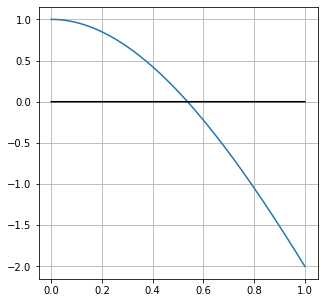

In [13]:
x = np.linspace(0,1, 100000)
plt.figure(figsize=(5,5))
y = x**3 - 4*x**2 + 1
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')
# plt.plot(x,x)
plt.grid()

In [27]:
def f(x): # tự viết
    return x**3 + x - 5
def daoham1(x): # tự viết
    return 3*x**2 + x - 5

a = 1
b = 2
n = 3
epxilon = 0
mode = 'delta_x'

# Với bài toán cho sẵn epxilon cần truyền vào tham số mode:
# mode = 'delta_x': tính sai số theo công thức sai số mục tiêu
# mode = 'err': tính sai số theo xấp xỉ liên tiếp

daycung(f, daoham1, a, b, n=n, epxilon=epxilon, mode=mode)

f(a) = -3,  f(b) = 5
m1 = 1
M1 = 9
x0: 1
d: 2

x: 1.375
xấp xỉ liên tiếp: 3.0
delta_x: 1.025390625

x: 1.4813614262560777
xấp xỉ liên tiếp: 0.8508914100486216
delta_x: 0.2678921375489649

x: 1.5077361492966772
xấp xỉ liên tiếp: 0.2109977843247961
delta_x: 0.06477506393091037

epxilon0: 0.0


# Tiếp tuyến

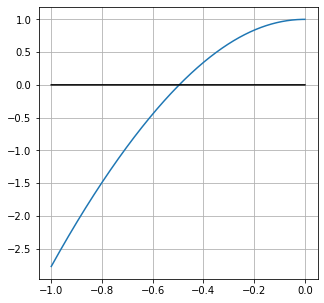

In [11]:
x = np.linspace(-1,0, 100000)
plt.figure(figsize=(5,5))
y = x**3 - 4*np.log(x**2+1)+1
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')
plt.grid()

In [5]:
def f(x): # tự viết
    return 2*x - 0.5*np.exp(x)
def daoham1(x): # tự viết
    return 2-0.5*np.exp(x)
def daoham2(x): # tự viết
    return -0.5*np.exp(x)

a = 0
b = 1
n = 0
epxilon = 0.5*10**-5
mode = 'delta_x'

# Tương tự dây cung

tieptuyen(f, daoham1, daoham2, a, b, n=n, epxilon=epxilon, mode=mode)

f(a) = -0.5,  f(b) = 0.6408590857704775
m1 = 0.6408590857704775
M2 = 1.3591409142295225
x0: 0

x: 0.3333333333333333
xấp xỉ liên tiếp: 0.11782282602348841
delta x: 0.04859031660437549

x: 0.35724647604398185
xấp xỉ liên tiếp: 0.0006063805408062727
delta x: 0.0003138226527766252

x: 0.3574029493733072
xấp xỉ liên tiếp: 2.5962863569383672e-08
delta x: 1.3653089420328683e-08

n = 3
epxilon0: 0.0021714459806446242


# Lặp đơn

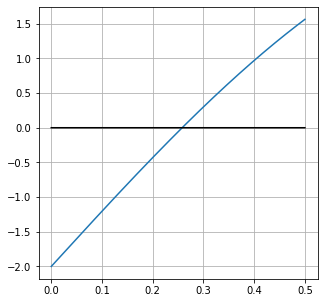

In [14]:
x = np.linspace(0,0.5, 100000)
plt.figure(figsize=(5,5))
y =  x**4 - x**3*4+8*x-2
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')
# plt.plot(x,x)
plt.grid()

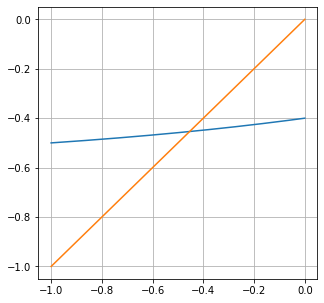

In [9]:
x = np.linspace(-1,0, 100000)
plt.figure(figsize=(5,5))
y = 0.2*2**x-0.6
plt.plot(x,y)
plt.plot(x,x)
plt.grid()

In [10]:
def f(x): # tự viết
    return x - 0.2*2**x+0.6
def phi(x): # tự viết
    return 0.2*2**x - 0.6
def daohamphi(x): # tự viết
    return 0.2*np.log(2)*2**x

#q = max(phi')

x0 = -1
n = 0
epxilon = 10**-10
a = -1
b = 0

x = np.linspace(a, b, 1000000)
q = np.max(np.abs(daohamphi(x))) 
lapdon(f, phi, x0, q, n=n, epxilon=epxilon)

q = 0.13862943611198905

x: -0.5
xấp xỉ liên tiếp: 0.08047026559988915

x: -0.4585786437626904
xấp xỉ liên tiếp: 0.0066663750758478545

x: -0.4544594309898844
xấp xỉ liên tiếp: 0.0006629482917803132

x: -0.4540432867325624
xấp xỉ liên tiếp: 6.69744778291406e-05

x: -0.45400117956006236
xấp xỉ liên tiếp: 6.776750709475157e-06

x: -0.45399691830799105
xấp xỉ liên tiếp: 6.858081719333776e-07

x: -0.45399648706172246
xấp xỉ liên tiếp: 6.940500354383769e-08

x: -0.4539964434187641
xấp xỉ liên tiếp: 7.023920901322256e-09

x: -0.45399643900201136
xấp xỉ liên tiếp: 7.108345323662476e-10

x: -0.45399643855502736
xấp xỉ liên tiếp: 7.193784326116239e-11

n = 10
epxilon0: 6.213475204444817e-10


# Gauss

In [10]:
a = np.array([[1 + 1/10, 1 + 2/25, 2.17],
              [1 + 9/100, 1 + 9/100, 2.18]])
b = Gauss(a.astype(np.float))

giai_Gauss(b)

[[1.1  1.08 2.17]
 [1.09 1.09 2.18]] 

[[1.1        1.08       2.17      ]
 [0.         0.01981818 0.02972727]] 

[[1.1        1.08       2.17      ]
 [0.         0.01981818 0.02972727]] 



array([[0.5],
       [1.5]])

# Gauss - Jordan

In [4]:
a = np.array([[1,1,-3,3,6],
              [4,2,1,-3,8],
              [2,5,2,4,6],
              [-7, 4,8,3,5]])
matrix = Gauss_Jordan(a.astype(np.float))
giai_GaussJordan(matrix)

[[ 1.  1. -3.  3.  6.]
 [ 4.  2.  1. -3.  8.]
 [ 2.  5.  2.  4.  6.]
 [-7.  4.  8.  3.  5.]] 

đã khử hàng:  []
chọn phần tử khử: 
hàng: 2
cột: 3
[[ 13.   7.   0.  -6.  30.]
 [  4.   2.   1.  -3.   8.]
 [ -6.   1.   0.  10. -10.]
 [-39. -12.   0.  27. -59.]] 



KeyboardInterrupt: Interrupted by user

# Chuẩn của ma trận

In [2]:
a = np.array([[2,-1,4],
              [5,3,2],
              [6,-7,3]])
print(f'chuẩn hàng: {chuanvocung(a)}')
print(f'chuẩn cột: {chuan1(a)}')
print(f'chuẩn Euclide: {chuanEuclid(a)}')
print(f'chuẩn 2: {chuan2(a)}')

chuẩn hàng: 16
chuẩn cột: 13
chuẩn Euclide: 12.36931687685298
chuẩn 2: 10.514399292182995


# Lặp đơn

In [10]:
#B, d là ma trận trong công thức lặp

B = np.array([[0.2,0.3,0.1],
              [0.4,0.1,0.1],
              [0.1,0.5,0.2]])

d = np.array([5.2,4.7,6.5])

X0 = np.array([14,13,18])
n = 3
epxilon = 0

# Nếu B, d là ma trận hệ số của hệ phương trình thì bỏ comment (bôi đen và ctrl + /) đoạn code dưới đây:

# for i in range(len(B)):
#     d[i] = d[i] / B[i,i]
#     B[i] = B[i] / B[i,i]
#     B[i] *= -1
#     B[i, i] = 0 

print(f'B = \n{B}\n')
print(f'd = \n{d}\n')

q = chuanvocung(B)

lapdon_matrix(B.astype(np.float), d.astype(np.float), X0, q, n=n, epxilon=epxilon)

B = 
[[0.2 0.3 0.1]
 [0.4 0.1 0.1]
 [0.1 0.5 0.2]]

d = 
[5.2 4.7 6.5]

q = 0.8

X =
 [[13.7]
 [13.4]
 [18. ]]
xấp xỉ liên tiếp: 1.600000000000009
Sai số tiên nghiệm: 1.600000000000009

X =
 [[13.76]
 [13.32]
 [18.17]]
xấp xỉ liên tiếp: 0.680000000000007
Sai số tiên nghiệm: 1.2800000000000074

X =
 [[13.765]
 [13.353]
 [18.17 ]]
xấp xỉ liên tiếp: 0.13200000000000503
Sai số tiên nghiệm: 1.024000000000006



# Lặp Jacobi

In [9]:
# B là ma trận hệ số của hệ phương trình

B = np.array([[3,-0.1,-0.2],
              [0.1,7,-0.3],
              [0.3,-0.2,10]])
d = np.array([7.85,19.3,71.4])
X0 = np.array([157/60, 193/70, 7.14])
n = 3
epxilon = 0

lapJacobi(B.astype(np.float), d.astype(np.float), X0, n=n, epxilon=epxilon)

chéo trội hàng
B = 
[[ 0.          0.03333333  0.06666667]
 [-0.01428571  0.          0.04285714]
 [-0.03        0.02        0.        ]]
d = 
[[2.61666667]
 [2.75714286]
 [7.14      ]]

q = 0.1

X =
 [[3.18457143]
 [3.0257619 ]
 [7.11664286]]
xấp xỉ liên tiếp: 0.0631005291005291
Sai số tiên nghiệm: 0.0631005291005291

X =
 [[3.19196825]
 [3.01664796]
 [7.1049781 ]]
xấp xỉ liên tiếp: 0.001296084656084674
Sai số tiên nghiệm: 0.006310052910052911

X =
 [[3.1908868 ]
 [3.01604237]
 [7.10457391]]
xấp xỉ liên tiếp: 0.00012016099773242633
Sai số tiên nghiệm: 0.0006310052910052912



# Hoocner

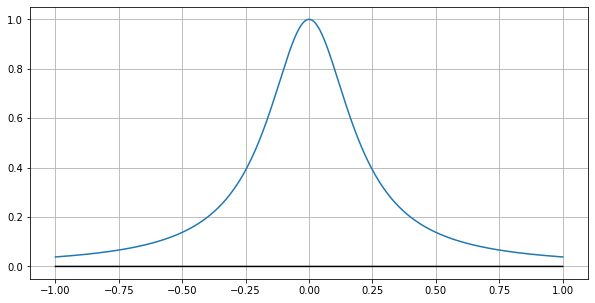

In [2]:
x = np.linspace(-1,1, 100000)
plt.figure(figsize=(10,5))
y =  1/(25*(x**2) +1)
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')

# plt.plot(x,x)
plt.grid()

### Sơ đồ chia

In [3]:
# chia đa thức (7x^6 - 8x^5 + 7x^3 +18x^2 - 9x - 20) cho (x - 2)

a = np.array([[4,5,-1,3,6]])
b = np.array([[2]])

pd.DataFrame(hoocner(a,b)[:,1:], index=hoocner(a,b)[:,0], columns=[i for i in range(len(a[0])-1,-1,-1)])

,4,3,2,1,0
0.0,4.0,5.0,-1.0,3.0,6.0
2.0,4.0,13.0,25.0,53.0,112.0


### Sơ đồ nhân

In [2]:
# nhân (x - 1)(x - 3)(x - 5)(x - 7)

a = np.array([[1,2,3,-5]])

pd.DataFrame(hoocnenguoc(a), index=a[0], columns=[i for i in range(len(a[0]),-1,-1)])

,4,3,2,1,0
1,0.0,0.0,0.0,1.0,-1.0
2,0.0,0.0,1.0,-3.0,2.0
3,0.0,1.0,-6.0,11.0,-6.0
-5,1.0,-1.0,-19.0,49.0,-30.0


# Nội suy Lagrange

In [7]:
# somoc = int(input("Số mốc nội suy: "))
# X = nhapX()
# Y = nhapY()

X = np.array([[2,2.5,3,3.5]])
Y = np.array([[6.90930, 8.09847, 9.14112, 10.4922]])
b = np.array([[2.5]])

NoisuyLG(X, Y, b)


Sơ đồ nhân:
        4     3      2      1     0
2.0  0.0   0.0   0.00   1.00  -2.0
2.5  0.0   0.0   1.00  -4.50   5.0
3.0  0.0   1.0  -7.50  18.50 -15.0
3.5  1.0 -11.0  44.75 -79.75  52.5 

Sơ đồ chia:
       1.00   -11.00   44.75  -79.75   52.50
2.0     1.0    -9.0   26.75  -26.25     0.0
2.5     1.0    -8.5   23.50  -21.00     0.0
3.0     1.0    -8.0   20.75  -17.50     0.0
3.5     1.0    -7.5   18.50  -15.00     0.0

Di:
      0    1    2    3     4
0  1.0 -0.5 -1.0 -1.5 -0.75
1  0.5  1.0 -0.5 -1.0  0.25
2  1.0  0.5  1.0 -0.5 -0.25
3  1.5  1.0  0.5  1.0  0.75

Y/Di =
 [[ -9.2124   32.39388 -36.56448  13.9896 ]]

Hệ số đa thức Lagrange cơ bản
             3     2          1     0
2.0 -1.333333  12.0 -35.666667  35.0
2.5  4.000000 -34.0  94.000000 -84.0
3.0 -4.000000  32.0 -83.000000  70.0
3.5  1.333333 -10.0  24.666667 -20.0

Hệ số đa thức P tìm được:
         3        2         1        0
0  0.6066 -4.84254  14.91912 -8.41158

Tính P tại x = [2.5]
           3        2         1   

# Nội suy Newton

### Newton tiến

In [2]:
X = np.array([[1.35, 1.57, 1.62, 1.84, 2.15]])
Y = np.array([[0.1465, 0.158, 0.071, -0.411, -1.462]])
b = np.array([[2.5]])

NoisuyNewtonTien(X,Y,b)


Bảng tỷ sai phân:
            0         1         2          3          4
1.35  0.1465  0.000000  0.000000   0.000000   0.000000
1.57  0.1580  0.052273  0.000000   0.000000   0.000000
1.62  0.0710 -1.740000 -6.638047   0.000000   0.000000
1.84 -0.4110 -2.190909 -1.670034  10.138803   0.000000
2.15 -1.4620 -3.390323 -2.263044  -1.022432 -13.951544

Bảng nhân:
         4     3        2          1         0
0.00  0.0  0.00   0.0000   0.000000  1.000000
1.35  0.0  0.00   0.0000   1.000000 -1.350000
1.57  0.0  0.00   1.0000  -2.920000  2.119500
1.62  0.0  1.00  -4.5400   6.849900 -3.433590
1.84  1.0 -6.38  15.2035 -16.037406  6.317806

Hệ số đa thức P tìm được:
            4          3           2           1           0
0 -13.951544  99.149653 -264.780511  312.631731 -136.949044

Tính P tại x = [2.5]
              4          3           2           1           0
0.0 -13.951544  99.149653 -264.780511  312.631731 -136.949044
2.5 -13.951544  64.270793 -104.103527   52.372913   -6.016761

-6.

### Newton lùi

In [32]:
X = np.array([[-2, -1, 0]])
Y = np.array([[-10.50049, -11.47159, -11.53912]])
b = np.array([[1.2]])

NoisuyNewtonLui(X,Y,b)


Bảng tỷ sai phân:
              0        1         2
-2.0 -10.50049  0.00000  0.000000
-1.0 -11.47159 -0.97110  0.000000
 0.0 -11.53912 -0.06753  0.451785

Bảng nhân:
         2    1    0
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0
-1.0  1.0  1.0  0.0

Hệ số đa thức P tìm được:
           2         1         0
0  0.451785  0.384255 -11.53912

Tính P tại x = [1.2]
             2         1          0
0.0  0.451785  0.384255 -11.539120
1.2  0.451785  0.926397 -10.427444

-10.427443599999997


### Newton cách đều tiến

In [10]:
somoc = 5
x0 = 1.7
xn = 2.1
b = np.array([[2000]])

X = np.linspace(x0, xn, somoc).reshape(1,-1)
Y = np.array([[2,1.7,2.2,2.6,3]])

NoisuyNTcachdeuTien(X, Y, b)


h = 0.10000000000000003

Bảng sai phân:
        0    1    2    3    4
1.7  2.0  0.0  0.0  0.0  0.0
1.8  1.7 -0.3  0.0  0.0  0.0
1.9  2.2  0.5  0.8  0.0  0.0
2.0  2.6  0.4 -0.1 -0.9  0.0
2.1  3.0  0.4  0.0  0.1  1.0

Bảng nhân:
        4    3     2    1    0
0.0  0.0  0.0   0.0  0.0  1.0
0.0  0.0  0.0   0.0  1.0 -0.0
1.0  0.0  0.0   1.0 -1.0  0.0
2.0  0.0  1.0  -3.0  2.0  0.0
3.0  1.0 -6.0  11.0 -6.0  0.0

Sau khi chia giai thừa:
      0    1    2     3         4
0  2.0 -0.3  0.4 -0.15  0.041667

Hệ số đa thức Pn(t):
           4    3         2     1    0
0  0.041667 -0.4  1.308333 -1.25  2.0

t = [19983.]


Tính P tại t = [19983.]
                 4        3             2             1             0
0.0      0.041667   -0.400  1.308333e+00 -1.250000e+00  2.000000e+00
19983.0  0.041667  832.225  1.663035e+07  3.323244e+11  6.640838e+15

6640837559111843.0


### Newton cách đều lùi

In [6]:
somoc = 8
x0 = 1920
xn = 1990

X = np.linspace(x0, xn, somoc).reshape(1,-1)
Y = np.array([[106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46]])
b = np.array([[2000]])

NoisuyNTcachdeuLui(X, Y, b)


h = 10.0

Bảng sai phân:
              0      1      2      3      4      5      6      7
1920.0  106.46   0.00   0.00   0.00   0.00   0.00   0.00   0.00
1930.0  123.08  16.62   0.00   0.00   0.00   0.00   0.00   0.00
1940.0  132.12   9.04  -7.58   0.00   0.00   0.00   0.00   0.00
1950.0  152.27  20.15  11.11  18.69   0.00   0.00   0.00   0.00
1960.0  180.67  28.40   8.25  -2.86 -21.55   0.00   0.00   0.00
1970.0  205.05  24.38  -4.02 -12.27  -9.41  12.14   0.00   0.00
1980.0  227.23  22.18  -2.20   1.82  14.09  23.50  11.36   0.00
1990.0  249.46  22.23   0.05   2.25   0.43 -13.66 -37.16 -48.52

Bảng nhân:
         7     6      5      4       3       2      1    0
 0.0  0.0   0.0    0.0    0.0     0.0     0.0    0.0  1.0
-0.0  0.0   0.0    0.0    0.0     0.0     0.0    1.0  0.0
-1.0  0.0   0.0    0.0    0.0     0.0     1.0    1.0  0.0
-2.0  0.0   0.0    0.0    0.0     1.0     3.0    2.0  0.0
-3.0  0.0   0.0    0.0    1.0     6.0    11.0    6.0  0.0
-4.0  0.0   0.0    1.0   10.0    35.

# Bình phương tối thiểu

In [9]:
x = np.array([[0.5, 1.5, 2.5, 3, 4]])
y = np.array([[0.45, 0.6, 0.7, 1.88, 6]])

phi1_x = x.copy() # Nếu cần một mảng giống x thì cần thêm ".copy()" để không ảnh hưởng đến ô nhớ chứa x
phi2_x = x**3 # tự viết
phi3_x = np.ones((1,5)) # tự viết

f = x*np.log(-y) # tự viết

# Nếu chỉ có phi1 và phi2 thì xóa phi3 đi :D
phi_x = np.concatenate([phi1_x, phi2_x, phi3_x])



Binhphuongtoithieu(x, f, phi1_x)

Phi(x):
          0    1    2    3    4
phi_1  0.5  1.5  2.5  3.0  4.0

Bộ hệ số:
 [[33.75]]

Hệ số tự do: 
 [[nan]]

Nghiệm của hệ: 
 [[nan]]


<ipython-input-9-3e7ed37236e1>:8: RuntimeWarning: invalid value encountered in log
  f = x*np.log(-y) # tự viết


# Tính gần đúng tích phân

### Tính theo công thức hình thang

In [4]:
def f(x): # tự viết
    return 1/x

def daoham2(x): # tự viết
    return -1/x**2

x0 = 1
xn = 1.7
h = 0.1
epxilon = 0

# Nếu bài toán không yêu cầu tính sai số theo M2 thì không cần sửa hàm daoham2 và đừng để ý đến "sai số"
# Nếu bài toán yêu cầu tính toán theo một sai số cho trước thì cần sửa daoham2 và epxilon ở trên, còn nếu tự tính tay ra h thì thoy :D
Tichphangandung_HT(x0, xn, h, f, daoham2=daoham2, epxilon=epxilon)

h = 0.1
h / 2 = 0.05 

     0         1         2         3         4         5      6         7
x  1.0  1.100000  1.200000  1.300000  1.400000  1.500000  1.600  1.700000
y  1.0  0.909091  0.833333  0.769231  0.714286  0.666667  0.625  0.588235

          0         1         2         3         4     5         6         7   \
x(h/2)  1.0  1.050000  1.100000  1.150000  1.200000  1.25  1.300000  1.350000   
y(h/2)  1.0  0.952381  0.909091  0.869565  0.833333  0.80  0.769231  0.740741   

              8         9         10        11     12        13        14  
x(h/2)  1.400000  1.450000  1.500000  1.550000  1.600  1.650000  1.700000  
y(h/2)  0.714286  0.689655  0.666667  0.645161  0.625  0.606061  0.588235  

Ih = 0.5311725039666215
I_h/2 = 0.5307644509488098
M2 = 1.0
Sai số: 0.0005833333333333334
Sai số qua lưới phủ: 0.0001360176726039238


### Tính theo công thức Simpson

In [3]:
def f(x):
    return np.sin(x)

def daoham4(x):
    return np.sin(x) # hàm cbrt là hàm căn bậc 3

x0 = np.pi/4
xn = np.pi/2
h = 0.1
epxilon = 0.5*10**-5

# cách sử dụng tương tự công thức hình thang

Simpson(x0, xn, h, f, daoham4=daoham4, epxilon=epxilon)

M4 = 1.0
h = 0.18398743167093065
          0         1         2         3         4
x  0.785398  0.981748  1.178097  1.374447  1.570796
y  0.707107  0.831470  0.923880  0.980785  1.000000

phi1 = 1.8122548927057758
phi2 = 0.9238795325112867
Ih = 0.6625930433155935


# Giải gần đúng phương trình vi phân

### Euler hiện

In [7]:
def f(x, y, z):
    return np.array([[z], # tự viết
                     [np.log(x*y + 1) + (z + 2.6)**2 + 2.1*x - 0.39]]) # Nếu đề bài cho phương trình vi phân 2 chiều thì cần sửa hàm này, nếu không thì để 0

x0 = 1
xn = 2
h = 0.2
w0 = np.array([[0.26], # tự viết
               [0.65]]) # tự viết

Euler_hien(x0, xn, h, w0, f)

     x           y             z
0  1.0    0.260000      0.650000
1  1.2    0.390000      3.150722
2  1.4    1.020144     10.267664
3  1.6    3.073677     44.070450
4  1.8   11.887767    480.646222
5  2.0  108.017012  47187.328169


### Euler ẩn

In [23]:
def f(x, y): #tự viết
    return x*y/x

x0 = 1
xn = 2
h = 0.1
y0 = 1
    
Euler_an(x0, xn, h, y0, f)

      x         y         u
0   1.0  1.000000  1.100000
1   1.1  1.110000  1.221000
2   1.2  1.232100  1.355310
3   1.3  1.367631  1.504394
4   1.4  1.518070  1.669877
5   1.5  1.685058  1.853564
6   1.6  1.870415  2.057456
7   1.7  2.076160  2.283776
8   1.8  2.304538  2.534992
9   1.9  2.558037  2.813841
10  2.0  2.839421  3.123363


### Euler cải tiến

In [6]:
def f(x, y):
    return np.exp(x)*y
    
x0 = 0
xn = 0.8
h = 0.1
y0 = 1

Euler_caitien(x0, xn, h, y0, f)

     x         y         u
0  0.0  1.000000  1.100000
1  0.1  1.110784  1.233545
2  0.2  1.247497  1.399867
3  0.3  1.418163  1.609596
4  0.4  1.633941  1.877697
5  0.5  1.910609  2.225615
6  0.6  2.270879  2.684660
7  0.7  2.748081  3.301477
8  0.8  3.392158  4.147096


### R-K 4

In [2]:
def f(x, y, z): # tự viết
    return x*y**2 

def g(x, y, z): # Nếu đề bài cho phương trình vi phân 1 chiều thì return 0
    return 0

x0 = 1
xn = 2
h = 0.1
y0 = 1
z0 = 0

RK_4(x0, xn, h, y0, z0, f, g)

      x             y    z             k1   l1             k2   l2  \
0   1.0  1.000000e+00  0.0   1.000000e-01  0.0   1.157625e-01  0.0   
1   1.1  1.117318e+00  0.0   1.373240e-01  0.0   1.617531e-01  0.0   
2   1.2  1.282049e+00  0.0   1.972380e-01  0.0   2.382806e-01  0.0   
3   1.3  1.526706e+00  0.0   3.030082e-01  0.0   3.802127e-01  0.0   
4   1.4  1.923010e+00  0.0   5.177154e-01  0.0   6.902793e-01  0.0   
5   1.5  2.666124e+00  0.0   1.066233e+00  0.0   1.586446e+00  0.0   
6   1.6  4.536001e+00  0.0   3.292049e+00  0.0   6.305878e+00  0.0   
7   1.7  1.622463e+01  0.0   4.475056e+01  0.0   2.607418e+02  0.0   
8   1.8  4.293403e+05  0.0   3.317995e+10  0.0   5.091969e+19  0.0   
9   1.9  4.553748e+74  0.0  3.939958e+148  0.0  7.567593e+295  0.0   
10  2.0           inf  0.0            inf  0.0            inf  0.0   

              k3   l3            k4   l4  
0   1.175068e-01  0.0  1.373704e-01  0.0  
1   1.651021e-01  0.0  1.973522e-01  0.0  
2   2.454165e-01  0.0  3.03309

C:\Users\DELL\AppData\Local\Temp/ipykernel_13180/841832270.py:2: RuntimeWarning: overflow encountered in double_scalars
  return x*y**2
